# Test the parameter set of the Enertech cells
In this notebook, we show how to use pybamm to reproduce the experimental results for the Enertech cells (LCO-G). To see all of the models and submodels available in PyBaMM, please take a look at the documentation [here](https://pybamm.readthedocs.io/en/latest/source/models/index.html).

In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

When you load a model in PyBaMM it builds by default. Building the model sets all of the model variables and sets up any variables which are coupled between different submodels: this is the process which couples the submodels together and allows one submodel to access variables from another. If you would like to swap out a submodel in an exisitng battery model you need to load it without building it by passing the keyword `build=False`

In [2]:
model = pybamm.lithium_ion.DFN(
    build=False,options = {"particle": "Fickian diffusion", "thermal": "lumped"}
)
# missing radiation heat in pybamm but considered in the paper.

We can get the parameter set `Ai2020` for the model, which includes the mechanical properties required by the mechanical model.

In [3]:
# param = model.default_parameter_values
chemistry = pybamm.parameter_sets.Ai2020
param = pybamm.ParameterValues(chemistry=chemistry)
experiment = pybamm.Experiment(["Discharge at 1C until 3 V"])

# var = pybamm.standard_spatial_vars
# var_pts = {
#   var.x_n: 50,
#   var.x_s: 50,
#   var.x_p: 50,
#   var.r_n: 50,
#   var.r_p: 50,
# }
# import pandas as pd
# mechanics = pd.read_csv("pybamm/input/parameters/lithium-ion/mechanicals/lico2_graphite_Ai2020/parameters.csv", 
#                        index_col=0, comment="#", skip_blank_lines=True, header=None)[1][1:].dropna().astype(float).to_dict()
# param.update(mechanics, check_already_exists=False)

sim1 = pybamm.Simulation(model, experiment=experiment,parameter_values=param)
solution = sim1.solve()

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
At t = 0.228721, , mxstep steps taken before reaching tout.


Load experimental results of the Enertech cells, Ref. Ai et al. JES 2020
https://iopscience.iop.org/article/10.1149/2.0122001JES/pdf

In [4]:
# load experimental results
import pandas as pd
path = "/home/aishine/GEM/PyBaMM/pybamm/input/discharge_data/Enertech_cells/"
Disp_01C=pd.read_csv (path + "0.1C_discharge_displacement.txt", delimiter= '\s+',header=None)
Disp_05C=pd.read_csv (path + "0.5C_discharge_displacement.txt", delimiter= '\s+',header=None)
Disp_1C=pd.read_csv (path + "1C_discharge_displacement.txt", delimiter= '\s+',header=None)
Disp_2C=pd.read_csv (path + "2C_discharge_displacement.txt", delimiter= '\s+',header=None)
V_01C=pd.read_csv (path + "0.1C_discharge_U.txt", delimiter= '\s+',header=None)
V_05C=pd.read_csv (path + "0.5C_discharge_U.txt", delimiter= '\s+',header=None)
V_1C=pd.read_csv (path + "1C_discharge_U.txt", delimiter= '\s+',header=None)
V_2C=pd.read_csv (path + "2C_discharge_U.txt", delimiter= '\s+',header=None)
T_05C=pd.read_csv (path + "0.5C_discharge_T.txt", delimiter= '\s+',header=None)
T_1C=pd.read_csv (path + "1C_discharge_T.txt", delimiter= '\s+',header=None)
T_2C=pd.read_csv (path + "2C_discharge_T.txt", delimiter= '\s+',header=None)

Plot the results.

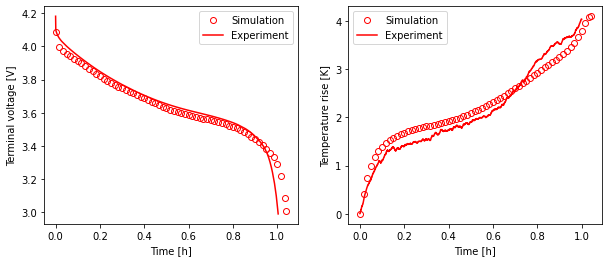

In [5]:
t_all = solution["Time [h]"].entries
V_n = solution["Terminal voltage [V]"].entries
T_n = solution["Volume-averaged cell temperature [K]"].entries - param["Initial temperature [K]"]

f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10,4))
ax1.plot(t_all, V_n,'ro',markerfacecolor='none',label="Simulation")
ax1.plot(V_1C.values[:,0]/3600, V_1C.values[:,1],'r-',label="Experiment")
ax1.legend()
#plt.xlim(0, 3600);
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("Terminal voltage [V]")

ax2.plot(t_all, T_n,'ro',markerfacecolor='none',label="Simulation")
ax2.plot(T_1C.values[0:3601,0]/3600, T_1C.values[0:3601,1],'r-',label="Experiment")
ax2.legend()
ax2.set_xlabel("Time [h]")
ax2.set_ylabel("Temperature rise [K]")
#plt.xlim(0, 3600);
f.show()


In [6]:
return
# without activity dependence
param.update({"1 + dlnf/dlnc": 1})
sim2 = pybamm.Simulation(model, experiment=experiment,parameter_values=param)
solution2 = sim2.solve()

SyntaxError: 'return' outside function (<ipython-input-6-46e85e1171ec>, line 1)

In [ ]:
t_all = solution2["Time [s]"].entries
V_n = solution2["Terminal voltage [V]"].entries
T_n = solution2["Volume-averaged cell temperature [K]"].entries - param["Initial temperature [K]"]

f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10,4))
ax1.plot(t_all, V_n,'ro',markerfacecolor='none',label="Simulation")
ax1.plot(V_1C.values[:,0], V_1C.values[:,1],'r-',label="Experiment")
ax1.legend()
#plt.xlim(0, 3600);
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Terminal voltage [V]")

ax2.plot(t_all, T_n,'ro',markerfacecolor='none',label="Simulation")
ax2.plot(T_1C.values[0:3601,0], T_1C.values[0:3601,1],'r-',label="Experiment")
ax2.legend()
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Temperature rise [K]")
#plt.xlim(0, 3600);
f.show()